In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

## Opening The Dataset.

We use a parser SBopen available in mplsoccer.

In [3]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)

### Get team names

In [4]:
team_1, team_2 = df.team_name.unique()

In [5]:
print(team_1, team_2)

England Women's Sweden Women's


### Making the shot map using iterative solution

In [6]:
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [9]:
shots.sample(5)

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
23e173af-2b8f-4507-92d1-b44ce8d477a0,3196,2,00:45:56.103000,90,56,184,0.3822,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8b408d9e-f60f-4057-af15-effe204d6292,2011,2,00:11:48.692000,56,48,115,0.2223,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15bc4547-0939-4b5f-bcf1-7abe8460b715,2261,2,00:18:35.122000,63,35,130,4.6937,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c20c4661-1578-4c5b-90cc-3f989bd881cb,1794,2,00:04:55.985000,49,55,100,1.3999,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64cc89fc-a8ac-49d2-a70e-19d8a76a948d,2204,2,00:16:32.408000,61,32,124,1.3116,69301,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


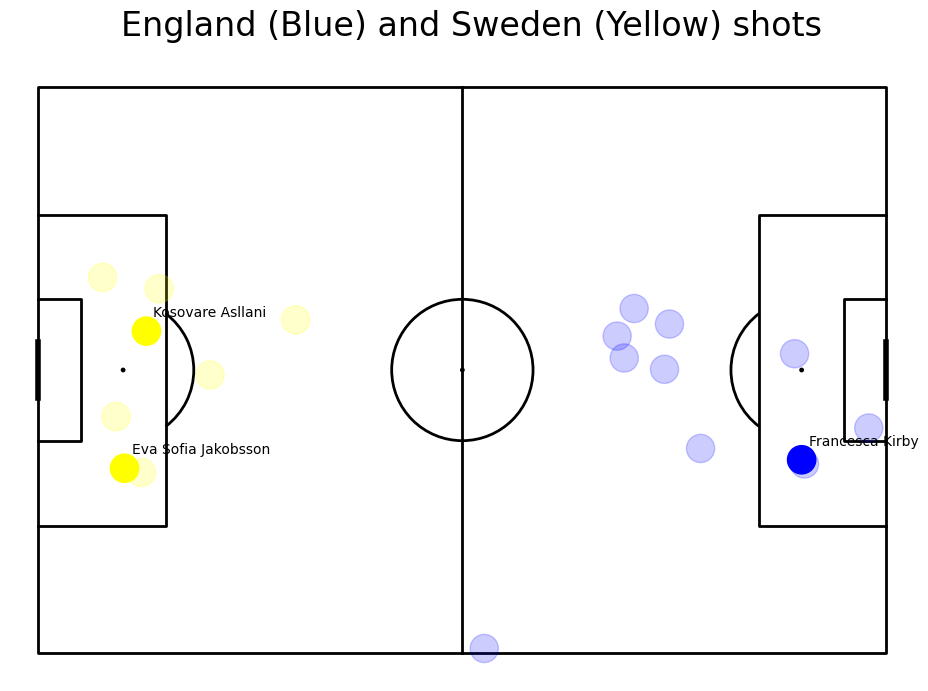

In [11]:
pitch = Pitch(line_color="black")
fig, ax = pitch.draw(figsize=(10, 7))

# Size of the pitch in yards (!!!)
pitch_length_x = 120
pitch_length_y = 80

# Plot the shots by looping through them.
for i, shot in shots.iterrows():
    x = shot['x']
    y = shot['y']
    goal = shot['outcome_name'] == 'Goal'
    team_name = shot['team_name']

    # set circlesize
    circle_size = 2

    # plot england.
    if (team_name == team_1):
        if goal:
            shot_circle = plt.Circle((x,y), circle_size, color="blue")
            plt.text(x+1, y-2, shot['player_name'])
        else:
            shot_circle = plt.Circle((x,y), circle_size, color="blue")
            shot_circle.set_alpha(.2)
    else:
        if goal:
            shot_circle = plt.Circle((pitch_length_x-x,pitch_length_y-y), circle_size, color="yellow")
            plt.text(pitch_length_x - x+1, pitch_length_y - y-2, shot['player_name'])
        else:
            shot_circle = plt.Circle((pitch_length_x - x, pitch_length_y - y), circle_size, color="yellow")
            shot_circle.set_alpha(.2)
    ax.add_patch(shot_circle)

# set title.
fig.suptitle("England (Blue) and Sweden (Yellow) shots", fontsize= 24)
fig.set_size_inches(10, 7)
plt.show()

### Using MPLSoccer's pitch class.

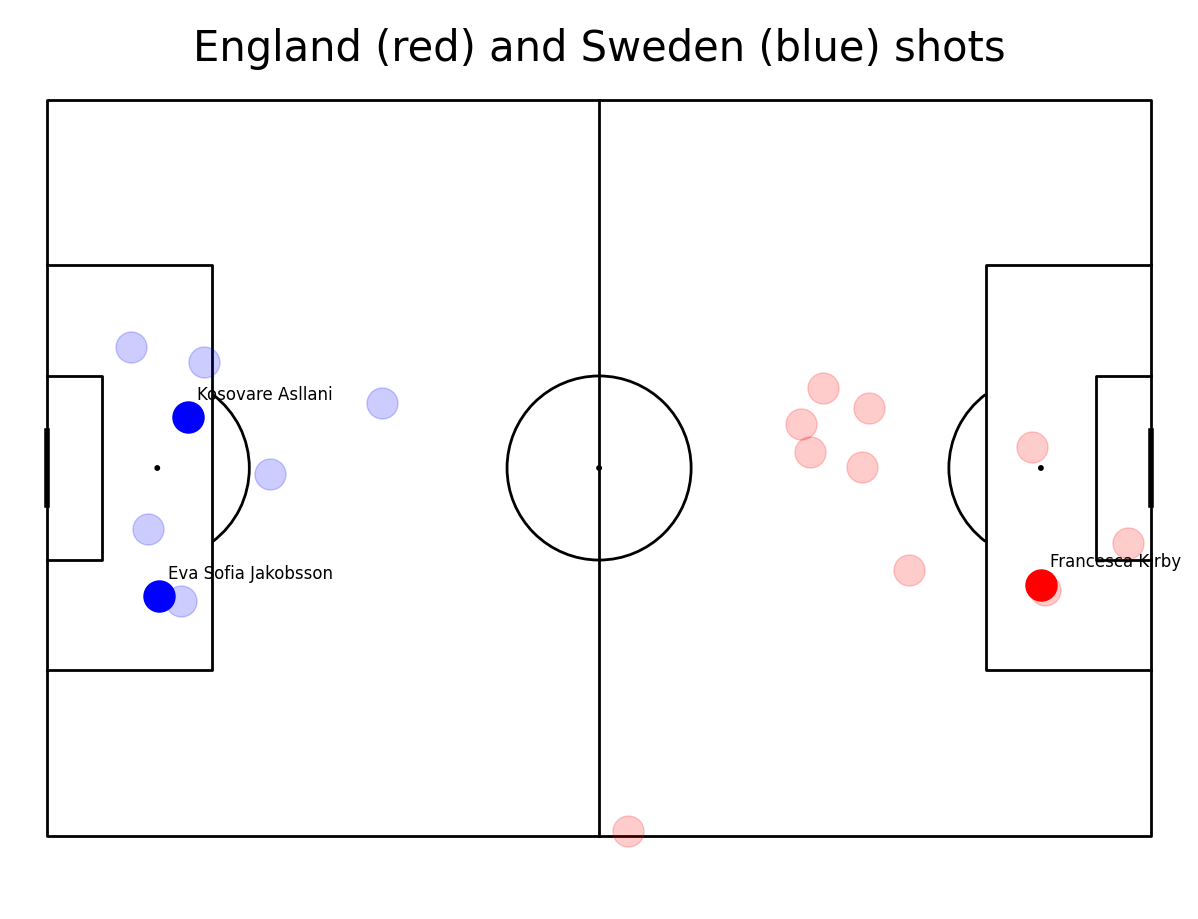

In [13]:
# Create pitch class.
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(
    grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0
)

# query
mask_england = (df.type_name == "Shot") & (df.team_name == team_1)
mask_sweden = (df.type_name == "Shot") & (df.team_name == team_2)

# Dfs
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', 'player_name']]
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', 'player_name']]

for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

fig.suptitle("England (red) and Sweden (blue) shots", fontsize=30)
plt.show()

### Plotting shots in one half

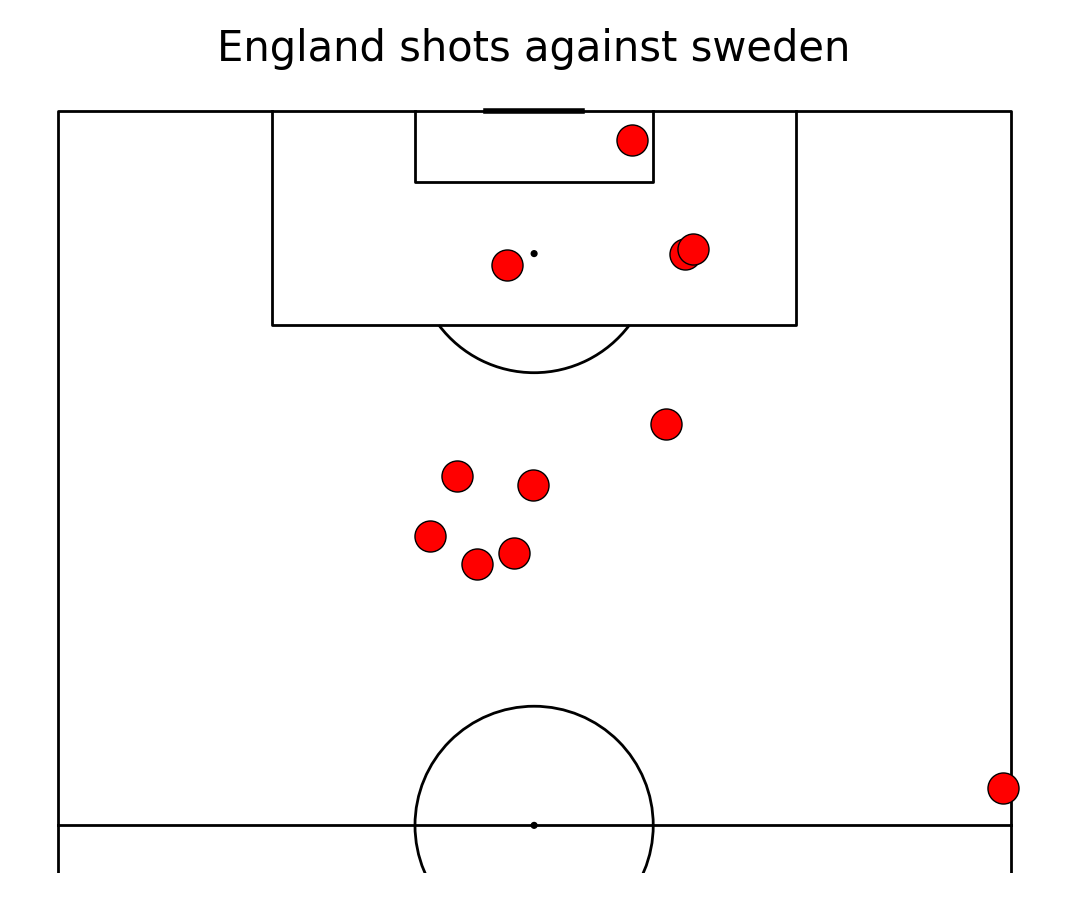

In [14]:
pitch = VerticalPitch(line_color="black", half=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# plotting all shots.
pitch.scatter(df_england.x, df_england.y, alpha=1, s=500, color="red", ax=ax['pitch'], edgecolors="black")
fig.suptitle("England shots against sweden", fontsize=30)
plt.show()

## Challenge

1. Create a Dataframe of passes which contains all the passes in the match.
2. Plot the start point of every Sweden pass. Attacking Left to right.
3. Plot only passes made by Caroline Seger (She is Sara Caroline Seger in the database)
4. Plot arrows to show where the passes went to.

#### 1. Creating Dataframe of passes.

In [50]:
mask_passes = (df.type_name == "Pass") & (df.sub_type_name != 'Throw-in')
passes_df = df.loc[mask_passes].set_index('id')

In [51]:
passes_df.sample(5)

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
id,,,,,,,,,,,,,,,,,,,,,
193757ea-6d91-4141-b923-3100b035c36d,3157,2,00:45:03.464000,90,3,182,2.247500,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3a0eedb2-5d4b-400e-9450-72f72e4d1241,362,1,00:11:38.263000,11,38,20,2.156500,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7792dec9-e2d8-48a8-b766-43878a07776c,86,1,00:01:30.197000,1,30,5,1.216100,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73b188e0-c89e-4d02-b816-6464f8846e87,3154,2,00:45:00.965000,90,0,182,1.725136,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a3632beb-ea26-4a13-9fe7-1adf8fed32e5,3100,2,00:42:50.283000,87,50,178,1.196000,69301,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Plotting the start point of every Sweden Pass.

In [52]:
mask_sweden_passes = mask_passes & (df.team_name == team_2)

In [53]:
sweden_passes_df = df.loc[mask_sweden_passes, ['id', 'x', 'y', 'player_name']].set_index('id')

In [54]:
sweden_passes_df.sample(2)

,x,y,player_name
id,,,
f437f1ad-f0cb-4950-8715-471bc774ca49,27.7,24.7,Linda Brigitta Sembrant
f4e43f95-92c3-48dc-9b39-db1c6860dcb0,61.6,66.0,Hanna Erica Maria Glas


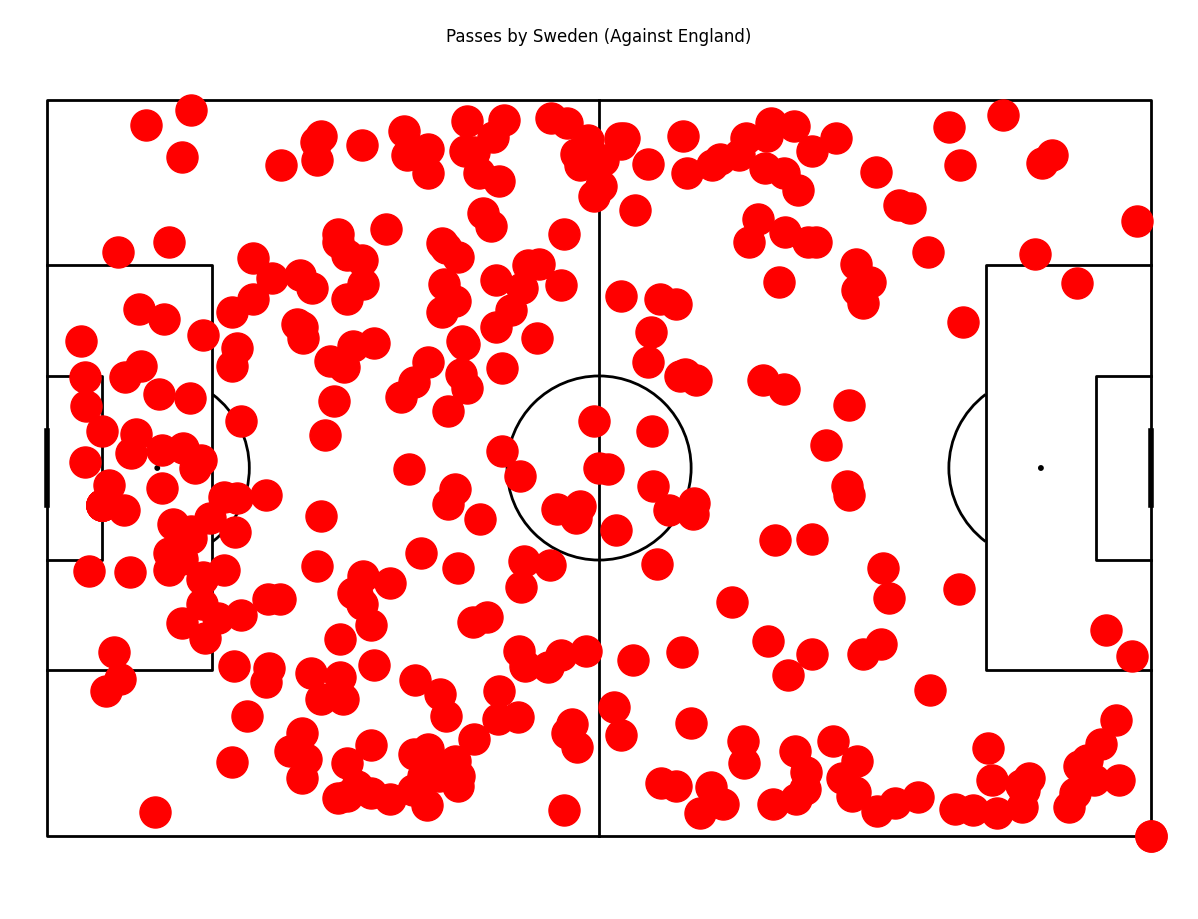

In [55]:
## Creating the pitch.
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(
    grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0
)

for i, row in sweden_passes_df.iterrows():
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       # pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)

fig.suptitle("Passes by Sweden (Against England)")
plt.show()

### Plotting the passes of Caroline Seger

In [56]:
mask_caroline_seger = mask_sweden_passes & (df['player_name'] == 'Sara Caroline Seger')
caroline_passes_df = df.loc[mask_caroline_seger, ['id', 'x', 'end_x', 'y', 'end_y', 'pass_angle', 'player_name']].set_index('id')

In [57]:
caroline_passes_df

,x,end_x,y,end_y,pass_angle,player_name
id,,,,,,
dd2c5d86-101a-4134-8801-db5ac116f5f0,88.7,98.5,22.1,28.2,0.556763,Sara Caroline Seger
23b4e816-d7c8-4a84-87e7-dc38abf25e13,69.3,86.1,29.8,4.8,-0.979110,Sara Caroline Seger
3c54609d-1b7a-4fcb-8e4f-926cc0dc6212,52.3,63.9,17.9,27.5,0.691337,Sara Caroline Seger
dbb93674-029c-4db2-9ed7-a2b391bed135,91.5,107.9,54.1,55.3,0.073041,Sara Caroline Seger
b95a0ecc-546d-470f-9372-9459f108ca4d,88.7,87.8,60.2,72.1,1.646283,Sara Caroline Seger
66774560-e621-4343-a348-c9b5be520179,83.6,90.1,15.5,7.8,-0.869705,Sara Caroline Seger
11dcb980-8601-4781-8c58-708b981baf08,70.2,63.9,45.0,34.5,-2.111216,Sara Caroline Seger
620d9790-0aa8-425f-a63d-7c81aa262079,88.0,85.7,20.7,5.7,-1.722945,Sara Caroline Seger
5b8be34d-7cf4-46b7-a57b-193889230839,59.5,51.3,10.4,3.4,-2.434979,Sara Caroline Seger


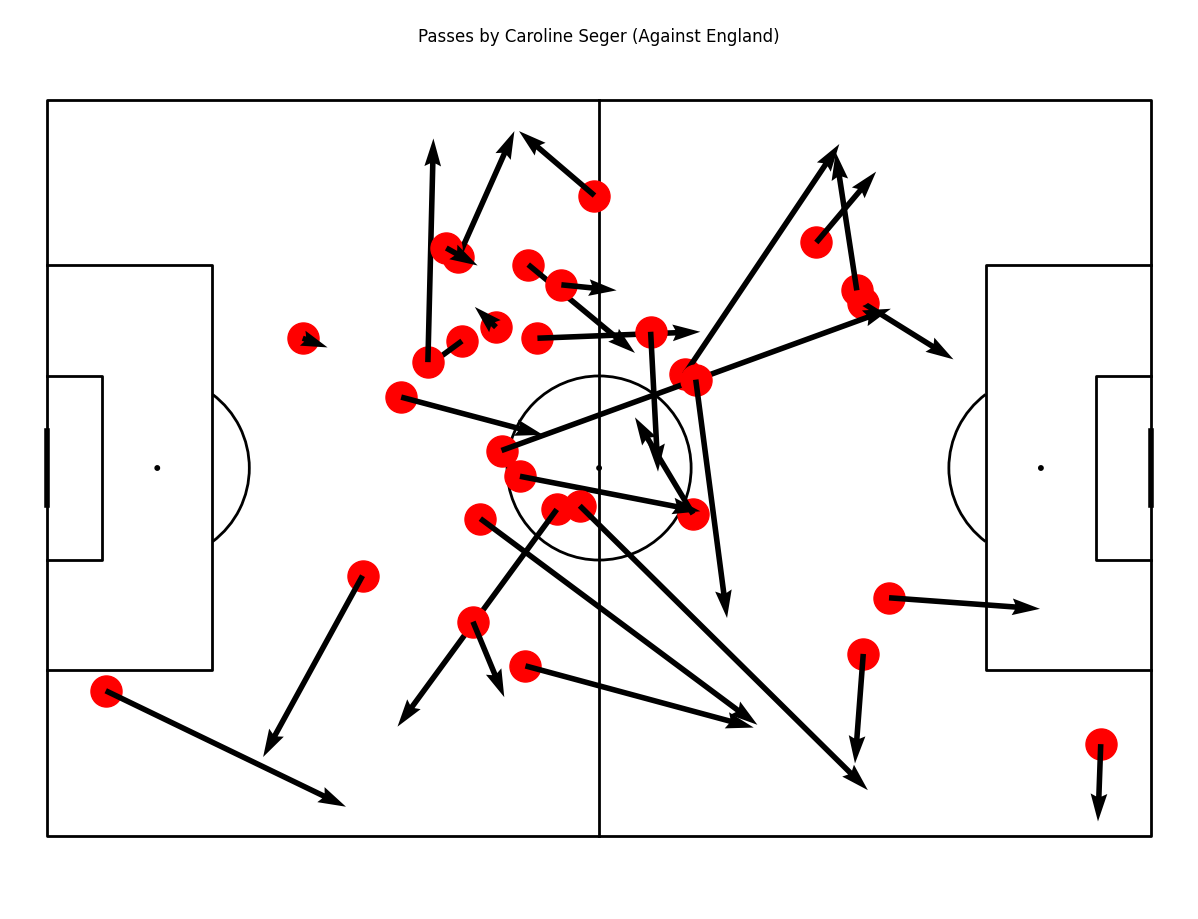

In [58]:
## Creating the pitch.
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(
    grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0
)

for i, row in caroline_passes_df.iterrows():
    #make circle
    pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
    pitch.arrows(row.x, row.y, row.end_x, row.end_y, ax=ax['pitch'])
       # pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)

fig.suptitle("Passes by Caroline Seger (Against England)")
plt.show()